In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Load the dataset
df = pd.read_csv('titanic01.csv')  # Ensure this file is in the same directory

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
# Create a NumPy array
arr = np.array([1, 2, 3, 4, 5])

# Calculate mean, sum, and standard deviation
print("Mean:", np.mean(arr))
print("Sum:", np.sum(arr))
print("Standard Deviation:", np.std(arr))

Mean: 3.0
Sum: 15
Standard Deviation: 1.4142135623730951


In [25]:
# Replace missing values in the "Age" column with the mean
df['Age'] = df['Age'].fillna(np.mean(df['Age']))

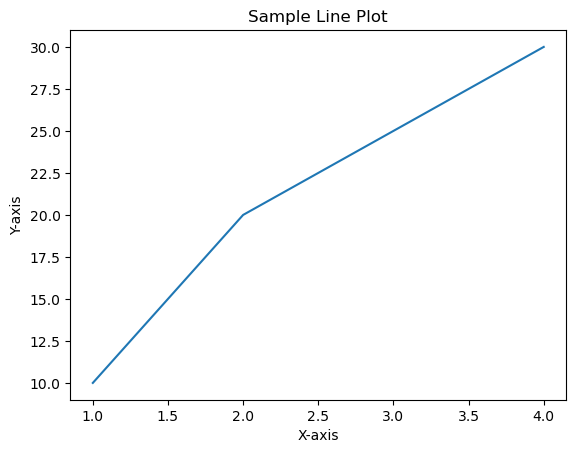

In [8]:
# Line plot
plt.plot([1, 2, 3, 4], [10, 20, 25, 30])
plt.title("Sample Line Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

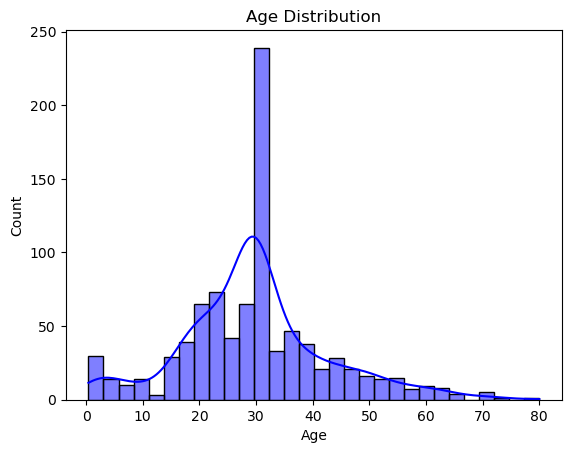

In [9]:
# Histogram of the "Age" column
sns.histplot(df['Age'], kde=True, color='blue')
plt.title("Age Distribution")
plt.show()

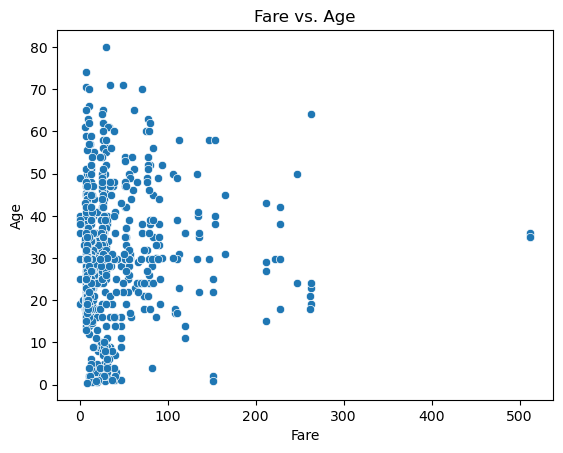

In [10]:

# Scatter plot between "Fare" and "Age"
sns.scatterplot(x='Fare', y='Age', data=df)
plt.title("Fare vs. Age")
plt.show()

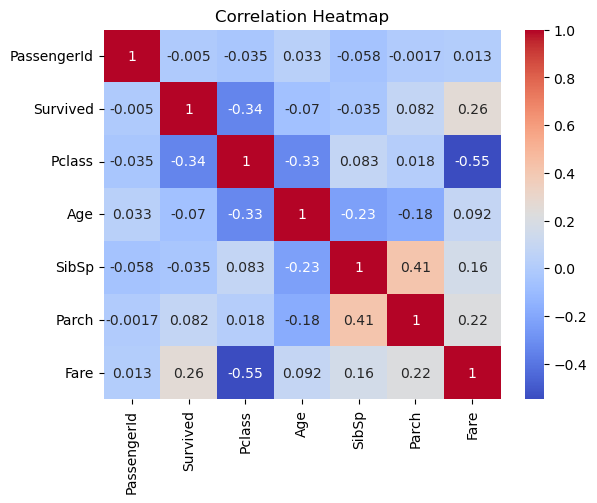

In [11]:
# Remove non-numeric columns
df_numeric = df.select_dtypes(include=[float, int])

# Create a correlation heatmap for only numeric columns
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [12]:
# Check missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [26]:
# Fill missing values in the "Embarked" column with the most frequent value
# Use .loc[] to modify the column
df.loc[:, 'Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [27]:
# Detect outliers in the "Fare" column using IQR
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [28]:
# Filter out rows with outliers
df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]
print("Data after removing outliers:", df.shape)

Data after removing outliers: (775, 12)


In [29]:
# Save the cleaned dataset to a new CSV file
df.to_csv('cleaned_titanic.csv', index=False)
print("Cleaned dataset saved as cleaned_titanic.csv")


Cleaned dataset saved as cleaned_titanic.csv


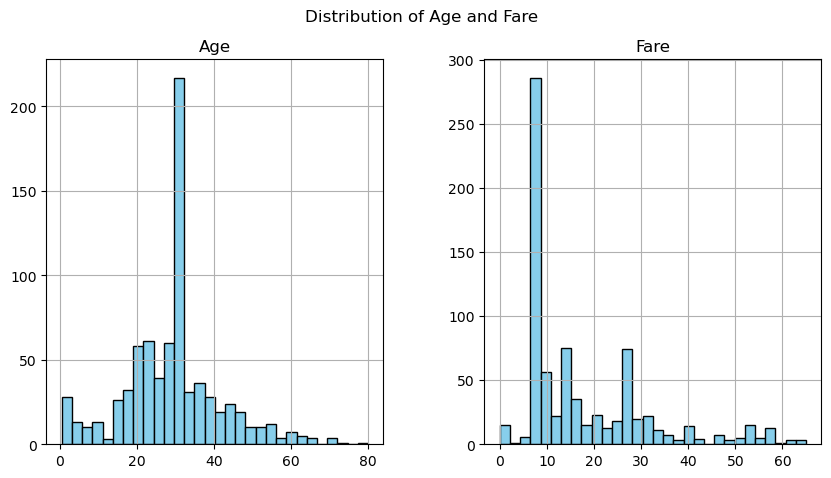

In [30]:
# Plot histograms for numerical features
df[['Age', 'Fare']].hist(bins=30, figsize=(10, 5), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Age and Fare')
plt.show()


C:\Users\S.A Computer\AppData\Local\Temp\ipykernel_14732\3677088548.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Embarked', palette='viridis')


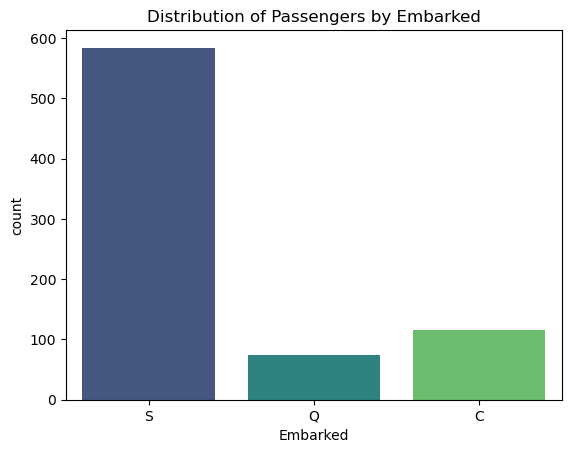

C:\Users\S.A Computer\AppData\Local\Temp\ipykernel_14732\3677088548.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Pclass', palette='magma')


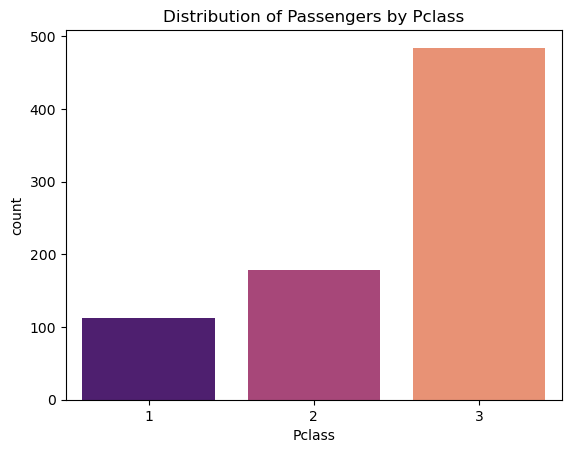

In [31]:
# Countplot for 'Embarked' column
sns.countplot(data=df, x='Embarked', palette='viridis')
plt.title('Distribution of Passengers by Embarked')
plt.show()

# Countplot for 'Pclass' column
sns.countplot(data=df, x='Pclass', palette='magma')
plt.title('Distribution of Passengers by Pclass')
plt.show()


C:\Users\S.A Computer\AppData\Local\Temp\ipykernel_14732\1115361802.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Survived', y='Age', palette='Set2')


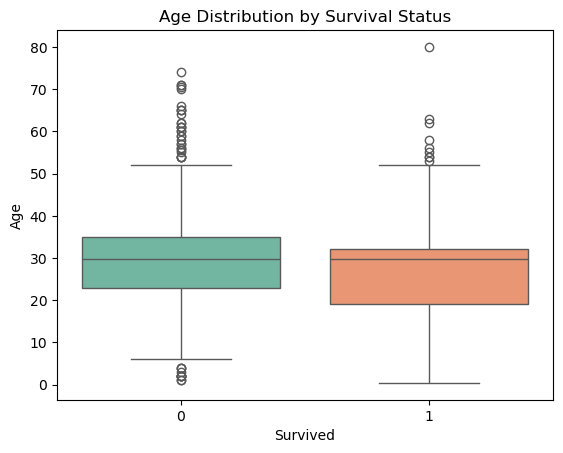

C:\Users\S.A Computer\AppData\Local\Temp\ipykernel_14732\1115361802.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Pclass', y='Fare', palette='coolwarm')


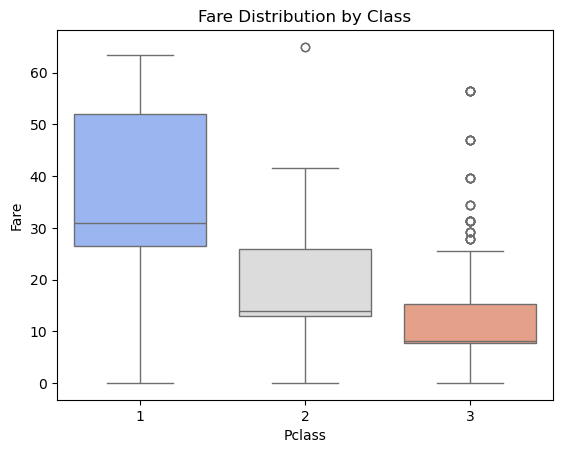

In [20]:
# Boxplot for 'Age' by 'Survived'
sns.boxplot(data=df, x='Survived', y='Age', palette='Set2')
plt.title('Age Distribution by Survival Status')
plt.show()

# Boxplot for 'Fare' by 'Pclass'
sns.boxplot(data=df, x='Pclass', y='Fare', palette='coolwarm')
plt.title('Fare Distribution by Class')
plt.show()


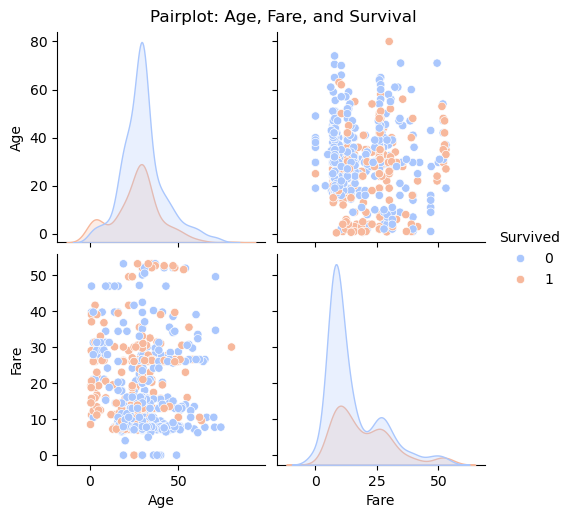

In [34]:
# Pairplot to visualize relationships between 'Age', 'Fare', and 'Survived'
sns.pairplot(df[['Age', 'Fare', 'Survived']], hue='Survived', palette='coolwarm')
plt.suptitle('Pairplot: Age, Fare, and Survival', y=1.02)
plt.show()


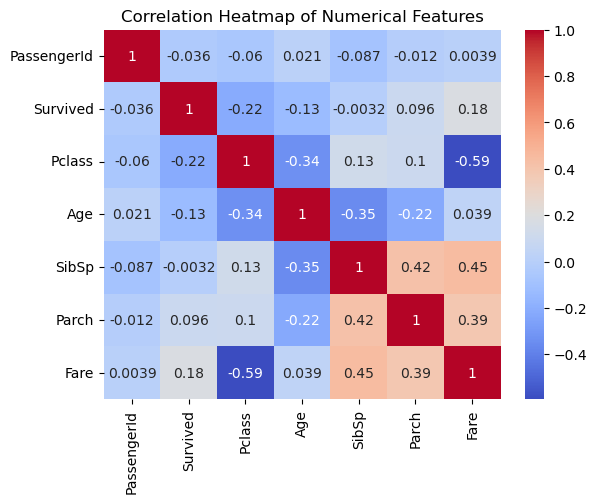

In [35]:
# Correlation heatmap for cleaned dataset
df_numeric = df.select_dtypes(include=[float, int])  # Ensure only numerical columns
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()
